# Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pylab as py

from linearmodels.iv import IV2SLS

from scipy.stats import zscore
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Read Data

In [3]:
df = pd.read_excel("./data.xlsx")

In [5]:
df.head()

,Provinsi,Kabupaten/Kota,Jumlah Penduduk,Tingkat Pengangguran,Persentase Kemiskinan,Indeks Pembangunan Manusia
0,Sumatera Barat,Kepulauan Mentawai,92021.0,2.92,14.43,61.26
1,Sumatera Barat,Pesisir Selatan,463923.0,6.02,7.88,70.08
2,Sumatera Barat,Kab.Solok,373414.0,4.72,7.98,69.08
3,Sumatera Barat,Sijunjung,237376.0,3.64,7.04,67.66
4,Sumatera Barat,Tanah Datar,348219.0,3.20,4.66,72.14


In [10]:
df.columns

Index(['provinsi', 'kota', 'jumlah_penduduk', 'tingkat_pengangguran',
       'persentase_miskin', 'ipm'],
      dtype='object')

In [8]:
col_rename = {
    "Provinsi": "provinsi",
    "Kabupaten/Kota": "kota",
    "Jumlah Penduduk": "jumlah_penduduk",
    "Tingkat Pengangguran": "tingkat_pengangguran",
    "Persentase Kemiskinan": "persentase_miskin",
    "Indeks Pembangunan Manusia": "ipm"
}

df = df.rename(columns=col_rename)

In [9]:
df

,provinsi,kota,jumlah_penduduk,tingkat_pengangguran,persentase_miskin,ipm
0,Sumatera Barat,Kepulauan Mentawai,92021.0,2.92,14.43,61.26
1,Sumatera Barat,Pesisir Selatan,463923.0,6.02,7.88,70.08
2,Sumatera Barat,Kab.Solok,373414.0,4.72,7.98,69.08
3,Sumatera Barat,Sijunjung,237376.0,3.64,7.04,67.66
4,Sumatera Barat,Tanah Datar,348219.0,3.20,4.66,72.14
...,...,...,...,...,...,...
324,DKI Jakarta,Jakarta Selatan,2264699.0,6.84,3.00,84.75
325,DKI Jakarta,Jakarta Timur,2937859.0,6.15,3.00,82.69
326,DKI Jakarta,Jakarta Pusat,928109.0,7.51,4.00,81.24
327,DKI Jakarta,Jakarta Barat,2589933.0,5.21,3.00,81.21


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   provinsi              329 non-null    object 
 1   kota                  329 non-null    object 
 2   jumlah_penduduk       329 non-null    float64
 3   tingkat_pengangguran  329 non-null    float64
 4   persentase_miskin     329 non-null    float64
 5   ipm                   329 non-null    float64
dtypes: float64(4), object(2)
memory usage: 15.5+ KB


# Statistik Deskriptif

In [13]:
df.describe()

,jumlah_penduduk,tingkat_pengangguran,persentase_miskin,ipm
count,3.290000e+02,329.000000,329.000000,329.000000
mean,6.864957e+05,4.839392,9.388906,71.291033
std,7.450686e+05,2.131296,4.590399,4.940859
min,2.429500e+04,0.190000,1.680000,61.140000
25%,2.015780e+05,3.260000,6.000000,67.830000
50%,4.038190e+05,4.390000,8.750000,70.270000
75%,9.339890e+05,6.080000,12.050000,73.800000
max,5.965410e+06,11.090000,26.930000,86.650000


### Deteksi Outlier

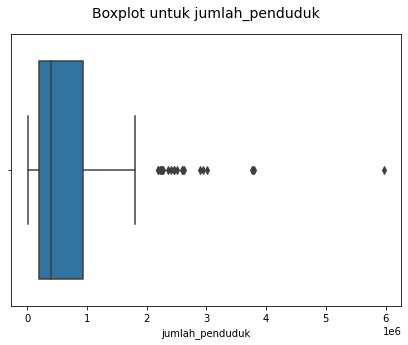

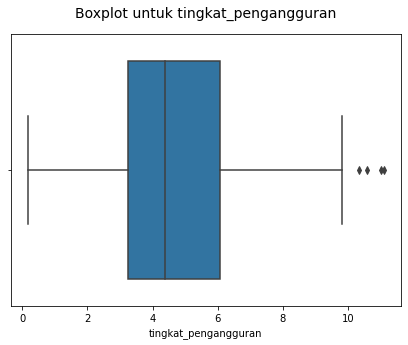

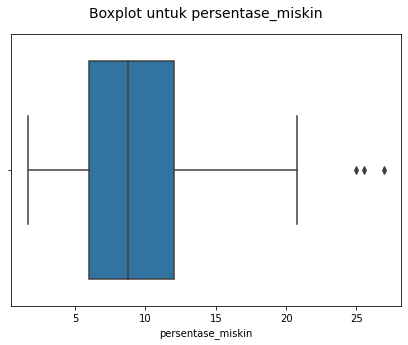

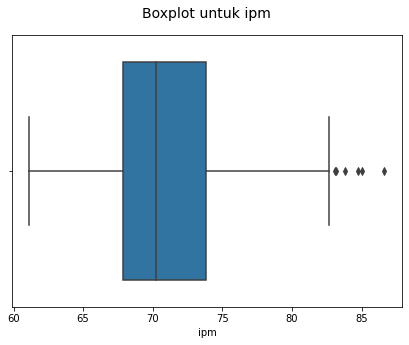

In [21]:
for col in df.columns[2:]:
    plt.figure(figsize=(7,5))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot untuk {col}', fontsize=14, y=1.04)
    plt.xlabel(col)
    plt.show()

Data yang telah diperoleh memiliki banyak outliers (dapat dilihat dari boxplot yang sudah dibuat diatas)

### Membersihkan Outlier

In [25]:
z_scores = zscore(df.select_dtypes(include=np.number))
abs_z_scores = np.abs(z_scores)
filtered = (abs_z_scores < 3).all(axis=1)
df = df[filtered]

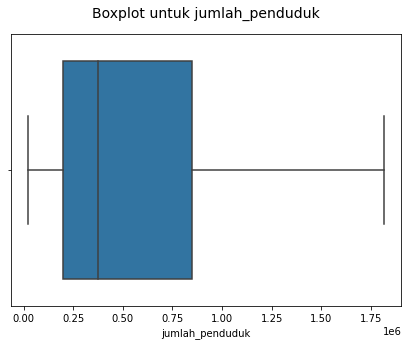

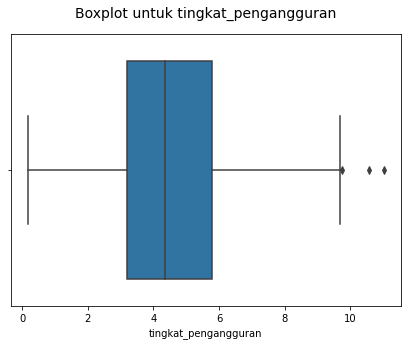

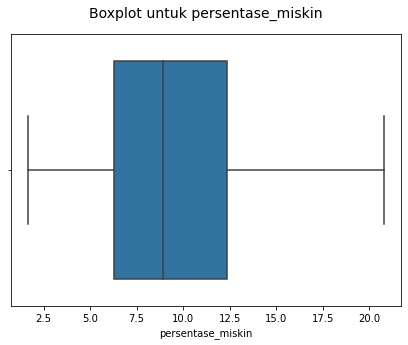

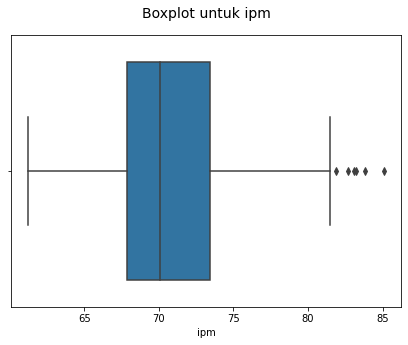

In [27]:
for col in df.columns[2:]:
    plt.figure(figsize=(7,5))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot untuk {col}', fontsize=14, y=1.04)
    plt.xlabel(col)
    plt.show()

In [28]:
df.describe()

,jumlah_penduduk,tingkat_pengangguran,persentase_miskin,ipm
count,3.020000e+02,302.000000,302.000000,302.000000
mean,5.395234e+05,4.659536,9.501358,71.015430
std,4.434599e+05,2.016954,4.339650,4.570357
min,2.429500e+04,0.190000,1.680000,61.260000
25%,1.963765e+05,3.200000,6.275000,67.845000
50%,3.740920e+05,4.345000,8.940000,70.090000
75%,8.484980e+05,5.797500,12.345000,73.425000
max,1.814110e+06,11.010000,20.780000,85.070000


# Uji

### Uji Hausman

In [31]:
x = sm.add_constant(df[["jumlah_penduduk", "ipm"]])
y = df["persentase_miskin"]
model = sm.OLS(y,x).fit()
y_pred = model.predict()
resid = y - y_pred

In [36]:
pred_df = pd.DataFrame({"prediction":y_pred,"residual":resid})
pred_df.head()

,prediction,residual
0,12.911387,1.518613
1,9.795364,-1.915364
2,10.099889,-2.119889
3,10.524735,-3.484735
4,8.863252,-4.203252


In [37]:
x1 = sm.add_constant(pred_df)
y1 = df["tingkat_pengangguran"]
model_1 = sm.OLS(y1,x1).fit()
print(model_1.summary())

                             OLS Regression Results                             
Dep. Variable:     tingkat_pengangguran   R-squared:                       0.058
Model:                              OLS   Adj. R-squared:                  0.052
Method:                   Least Squares   F-statistic:                     9.238
Date:                  Sat, 01 Jan 2022   Prob (F-statistic):           0.000128
Time:                          11:40:01   Log-Likelihood:                -630.84
No. Observations:                   302   AIC:                             1268.
Df Residuals:                       299   BIC:                             1279.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0118      0.599

**Simultaneous Significance Testing**  

Uji hipotesis dari Prob(F-statistics):  
$H_{0}$ : Semua variabel bebas tidak memiliki pengaruh timbal balik terhadap variabel bebas dalam model.  
$H_{1}$ : Semua variabel independen secara simultan mempengaruhi variabel dependen.

Prob(F-Statistics) yang kami dapatkan dari model tersebut adalah 0.000128. Prob(F-Statistics) ini lebih rendah dari 0.05 dan ini berarti kami menolak $H_{0}$. Ini juga berarti bahwa semua variabel independen secara simultan mempengaruhi variabel indepen.

#

### Uji Identifikasi

In [38]:
K, k, m = 2, 1, 2

if (K - k == m - 1):
    print('Identified')
elif (K - k >= m - 1):
    print('Overidentified')
elif (K - k <= m - 1):
    print('Underidentified')
else:
    print('Wrong')

Identified


Karena kedua persamaan yang kami gunakan memiliki jumlah K, k dan m yang sama, maka uji identifikasi diatas akan menghasilkan hasil yang sama ya itu "Identified".

**Kondisi Order**

In [39]:
Const = 'alpha_0', 'alpha_2'
Y1 = 1, 'alpha_3'
Y2 = 'alpha_1', 1
X1 = 'beta_0', 0
X2 = 0, 'beta_1'
mat = pd.DataFrame({'Const':Const,'Y1':Y1,'Y2':Y2,'X1':X1,'X2':X2},index=['Persentase Kemiskinan','Tingkat Pengangguran'])
mat

,Const,Y1,Y2,X1,X2
Persentase Kemiskinan,alpha_0,1,alpha_1,beta_0,0
Tingkat Pengangguran,alpha_2,alpha_3,1,0,beta_1


# Estimasi Parameter Model

In [64]:
train_df, test_df = train_test_split(df, test_size=0.2, shuffle=False)

In [65]:
formula_1 ='(persentase_miskin) ~ 1 + (ipm) + [(tingkat_pengangguran) ~ (jumlah_penduduk)]'

model_1 = IV2SLS.from_formula(formula_1, train_df).fit()
print(model_1)

                          IV-2SLS Estimation Summary                          
Dep. Variable:      persentase_miskin   R-squared:                     -4.8233
Estimator:                    IV-2SLS   Adj. R-squared:                -4.8722
No. Observations:                 241   F-statistic:                    5.1125
Date:                Sat, Jan 01 2022   P-value (F-stat)                0.0776
Time:                        12:22:29   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                                  Parameter Estimates                                   
                      Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------------
Intercept                62.514     35.327     1.7695     0.0768     -6.7270      131.75
ipm         

Dari modelling diatas, kami mendapatkan persamaan sebagai berikut:  
$$ Y_{1} = 62.514 - 1.0995X_{1} + 5.5804Y_{2} + u_{i} $$

In [66]:
formula_2 = 'tingkat_pengangguran ~ 1 + jumlah_penduduk + [(persentase_miskin) ~ ipm ]'

model_2 = IV2SLS.from_formula(formula_2, train_df).fit()
print(model_2)

                           IV-2SLS Estimation Summary                           
Dep. Variable:     tingkat_pengangguran   R-squared:                     -0.5134
Estimator:                      IV-2SLS   Adj. R-squared:                -0.5261
No. Observations:                   241   F-statistic:                    21.926
Date:                  Sat, Jan 01 2022   P-value (F-stat)                0.0000
Time:                          12:22:36   Distribution:                  chi2(2)
Cov. Estimator:                  robust                                         
                                                                                
                                 Parameter Estimates                                 
                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------
Intercept             7.5191     0.8230     9.1364     0.0000      5.9061      9.1321
jumlah_p

Dari modelling diatas, kami mendapatkan persamaan sebagai berikut:  
$$ Y_{2} = 7.5191 + 9.392e^{-07}X_{2} - 0.3612Y_{1} + u_{i} $$

# Classic Assumption

### 1. Uji Multikolinearitas

Kami menguji multikolinearitas menggunakan VIF

In [67]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
    return vif

In [68]:
X = df[['tingkat_pengangguran', 'ipm']]
calc_vif(X)

,Variables,VIF
0,tingkat_pengangguran,6.756672
1,ipm,6.756672


In [69]:
X = df[['persentase_miskin', 'jumlah_penduduk']]
calc_vif(X)

,Variables,VIF
0,persentase_miskin,2.089164
1,jumlah_penduduk,2.089164


Karena semua nilai VIF yang telah diuji itu dibawah 10, maka tidak terdapat multikolinearitas pada data kami.

### 2. Uji Heteroskedastisitas

In [70]:
df['persentase_miskin_pred'] = model_1.predict(data = train_df)
df['tingkat_pengangguran_pred'] = model_2.predict(data = train_df)

/var/folders/p7/qbt3zp_s3l592bdjy_czg2qm0000gn/T/ipykernel_98682/3754405617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['persentase_miskin_pred'] = model_1.predict(data = train_df)
/var/folders/p7/qbt3zp_s3l592bdjy_czg2qm0000gn/T/ipykernel_98682/3754405617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tingkat_pengangguran_pred'] = model_2.predict(data = train_df)


In [71]:
df['resid_1'] = df['persentase_miskin'] - df['persentase_miskin_pred']
df['resid_2'] = df['tingkat_pengangguran'] - df['tingkat_pengangguran_pred']

/var/folders/p7/qbt3zp_s3l592bdjy_czg2qm0000gn/T/ipykernel_98682/4165422805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resid_1'] = df['persentase_miskin'] - df['persentase_miskin_pred']
/var/folders/p7/qbt3zp_s3l592bdjy_czg2qm0000gn/T/ipykernel_98682/4165422805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resid_2'] = df['tingkat_pengangguran'] - df['tingkat_pengangguran_pred']


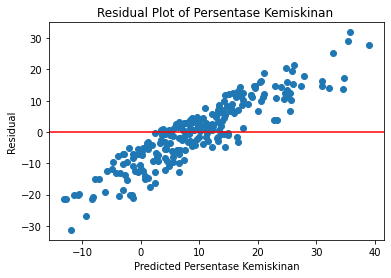

In [72]:
plt.scatter(df['persentase_miskin_pred'], df['persentase_miskin_pred'] - train_df['persentase_miskin'])
plt.axhline(0, color='r')
plt.title('Residual Plot of Persentase Kemiskinan ')
plt.xlabel('Predicted Persentase Kemiskinan')
plt.ylabel('Residual')
plt.show()

In [73]:
model_fit = smf.ols('persentase_miskin ~ 1 + ipm ', data = train_df).fit()

# Breusch-Pagan test
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model_fit.resid, model_fit.model.exog)

lzip(labels, test)

[('Lagrange multiplier statistic', 2.4295628931994644),
 ('p-value', 0.1190660950633261),
 ('f-value', 2.4339374924929382),
 ('f p-value', 0.12005747272373012)]

Karena p-value (0.119066095) < alpha (0.05), maka dari itu kami dapat menyimpulkan bahwa data 'Persentase Kemiskinan' itu **Homoskedastik**.

Text(0, 0.5, 'Residual')

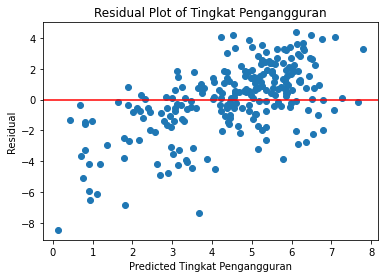

In [74]:
plt.scatter(df['tingkat_pengangguran_pred'], df['tingkat_pengangguran_pred'] - train_df['tingkat_pengangguran'])
plt.axhline(0, color='r')
plt.title('Residual Plot of Tingkat Pengangguran')
plt.xlabel('Predicted Tingkat Pengangguran')
plt.ylabel('Residual')

In [75]:
model_fit = smf.ols('tingkat_pengangguran ~ 1 + jumlah_penduduk', data = train_df).fit()

#perform Breusch-Pagan test
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model_fit.resid, model_fit.model.exog)

lzip(labels, test)

[('Lagrange multiplier statistic', 0.2710812405735531),
 ('p-value', 0.602607387587861),
 ('f-value', 0.26913433097677325),
 ('f p-value', 0.6043930669795737)]

Karena p-value (0.119066095) < alpha (0.05), maka dari itu kami dapat menyimpulkan bahwa data 'Tingkat Pengangguran' itu **Homoskedastik**.  

Dari kedua tes homoskedastik diatas, maka dapat disimpulkan bahwa kedua variabel memiliki data yang **Homoskedastik**.

### 3. Uji Normalitas

**Residual 1**

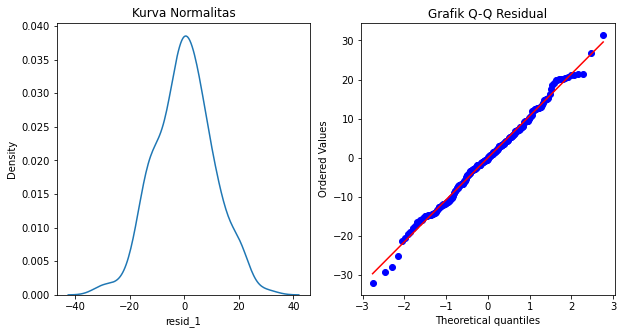

In [78]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Kurva Normalitas')
sns.kdeplot(df['resid_1'])
plt.subplot(1, 2, 2)
stats.probplot(df['resid_1'].dropna(),plot=py)
plt.title('Grafik Q-Q Residual')
plt.show()

In [79]:
df['resid_1'].describe()

count    2.410000e+02
mean     8.324848e-13
std      1.066356e+01
min     -3.185919e+01
25%     -6.877413e+00
50%     -2.071073e-01
75%      6.883377e+00
max      3.126881e+01
Name: resid_1, dtype: float64

**Residual 2**

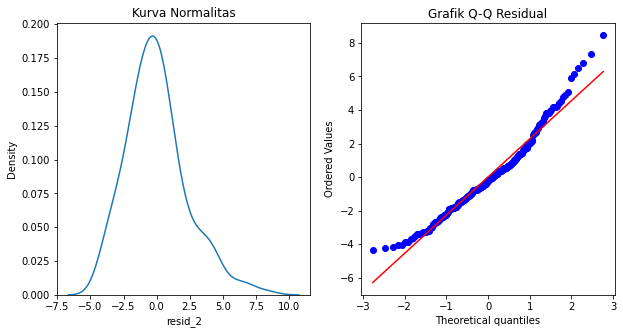

In [80]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.kdeplot(df['resid_2'])
plt.title('Kurva Normalitas')
plt.subplot(1,2,2)
stats.probplot(df['resid_2'].dropna(),plot=py)
plt.title('Grafik Q-Q Residual')
plt.show()

In [81]:
df['resid_2'].describe()

count    2.410000e+02
mean    -5.448477e-14
std      2.303053e+00
min     -4.365012e+00
25%     -1.500316e+00
50%     -1.923907e-01
75%      1.092200e+00
max      8.449434e+00
Name: resid_2, dtype: float64

**Tingkat Pengangguran**

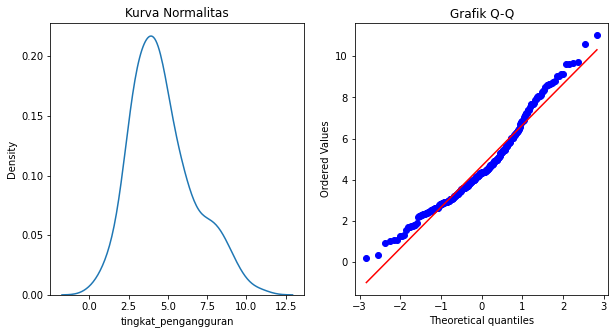

In [82]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Kurva Normalitas')
sns.kdeplot(df['tingkat_pengangguran'])
plt.subplot(1,2,2)
stats.probplot(df['tingkat_pengangguran'].dropna(),plot=py)
plt.title('Grafik Q-Q')
plt.show()

**Jumlah Penduduk**

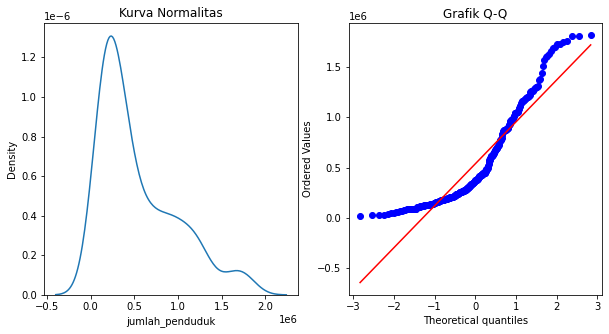

In [83]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Kurva Normalitas')
sns.kdeplot(df['jumlah_penduduk'])
plt.subplot(1,2,2)
stats.probplot(df['jumlah_penduduk'].dropna(),plot=py)
plt.title('Grafik Q-Q')
plt.show()

**Persentase Kemiskinan**

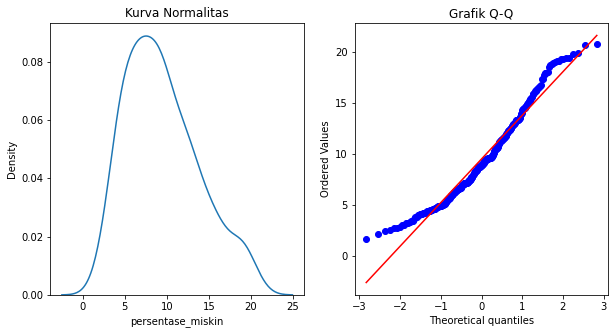

In [84]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Kurva Normalitas')
sns.kdeplot(df['persentase_miskin'])
plt.subplot(1,2,2)
stats.probplot(df['persentase_miskin'].dropna(),plot=py)
plt.title('Grafik Q-Q')
plt.show()

**Indeks Pembangunan Manusia**

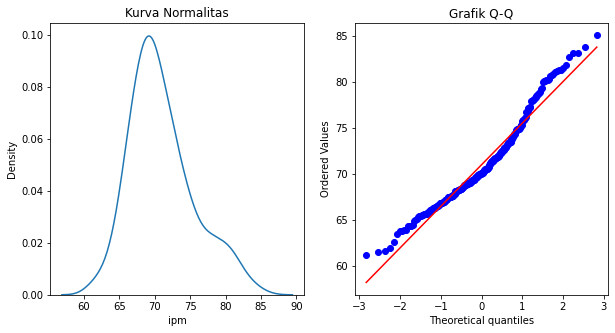

In [85]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Kurva Normalitas')
sns.kdeplot(df['ipm'])
plt.subplot(1,2,2)
stats.probplot(df['ipm'].dropna(),plot=py)
plt.title('Grafik Q-Q')
plt.show()

Dari **Grafik Q-Q** dapat dilihat bahwa data yang kami miliki dan residualnya, memiliki distribusi yang normal.

Namun, dari **Kurva Normalitas** dapat dilihat bahwa data dan residual yang kami miliki cenderung banyak kekiri (Slope to the right / Positive Skewness )

### 4. Uji Linearitas

In [86]:
df1= df[['persentase_miskin', 'tingkat_pengangguran', 'ipm']]
df2= df[['persentase_miskin', 'tingkat_pengangguran', 'jumlah_penduduk']]

**Persamaan 1**

<AxesSubplot:>

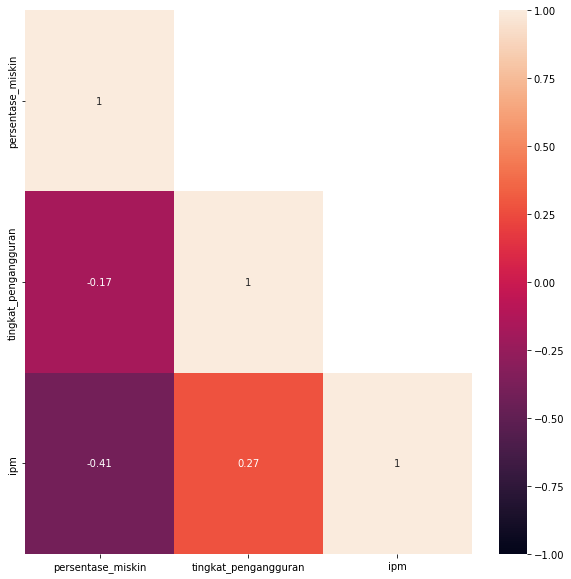

In [87]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot=True,vmin=-1, vmax=1, mask=np.triu(df1.corr(), k=1))
plt.show()

**Persamaan 2**

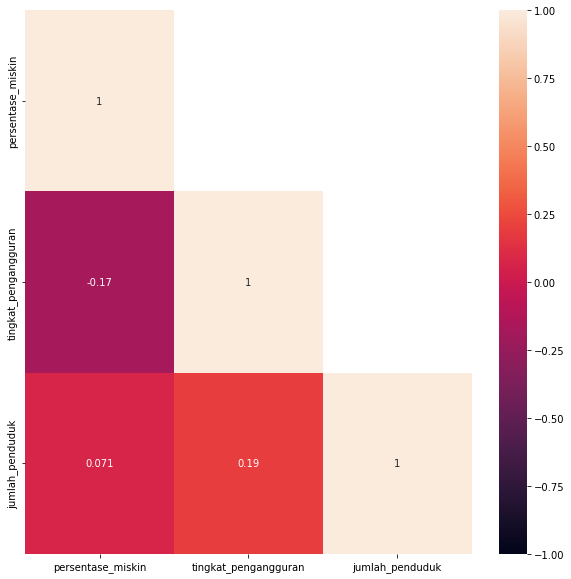

In [89]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(),annot=True,vmin=-1, vmax=1,mask=np.triu(df2.corr(),k=1))
plt.show()

# Kalkulasi Error pada Data Train

In [90]:
mse_model_train = mean_squared_error(train_df['persentase_miskin'], df['persentase_miskin_pred'].dropna())
rmse_model_train  =np.sqrt(mse_model_train)

print("MSE of Equation 1 (Train) :",mse_model_train)
print("RMSE of Equation 1 (Train):", rmse_model_train)

MSE of Equation 1 (Train) : 113.23961457412562
RMSE of Equation 1 (Train): 10.641410365836176


In [91]:
mse_model_train = mean_squared_error(train_df['tingkat_pengangguran'], df['tingkat_pengangguran_pred'].dropna())
rmse_model_train = np.sqrt(mse_model_train)

print("MSE of Equation 2 (Train) :", mse_model_train)
print("RMSE of Equation 2 (Train) :", rmse_model_train)

MSE of Equation 2 (Train) : 5.2820437491302705
RMSE of Equation 2 (Train): 2.298269729411731


In [93]:
print("R-Squared (R2) of Equation 1 (Train) :", model_1.rsquared)
print("R-Squared (R2) of Equation 2 (Train) :", model_2.rsquared)

R-Squared (R2) of Equation 1 (Train) : -4.82327518456402
R-Squared (R2) of Equation 2 (Train) : -0.5133793979502403


# Kecocokan Model

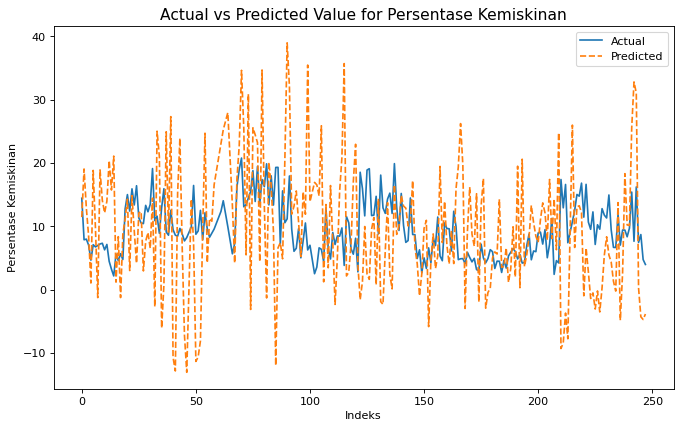

In [95]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(train_df["persentase_miskin"],label="Actual")
plt.plot(df['persentase_miskin_pred'],label="Predicted",linestyle="--")
plt.title('Actual vs Predicted Value for Persentase Kemiskinan',size=14)
plt.xlabel('Indeks') 
plt.ylabel('Persentase Kemiskinan')
plt.legend()
plt.show()

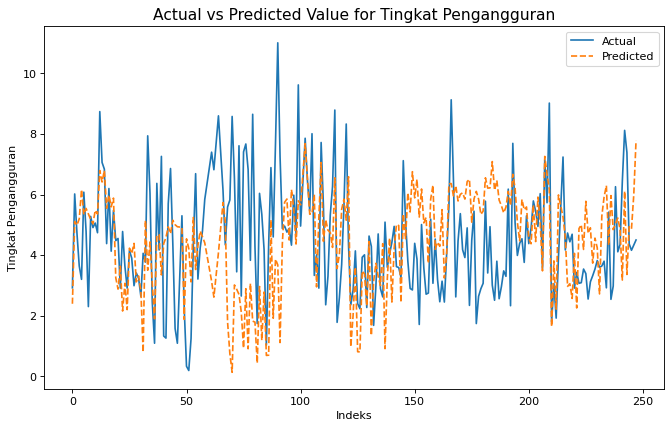

In [97]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(train_df["tingkat_pengangguran"],label="Actual")
plt.plot(df['tingkat_pengangguran_pred'],label="Predicted",linestyle="--")
plt.title('Actual vs Predicted Value for Tingkat Pengangguran',size=14)
plt.xlabel('Indeks') 
plt.ylabel('Tingkat Pengangguran')
plt.legend()
plt.show()